In [18]:
#!/usr/bin/env python3

# EfficientDet Object Detection
# * Single Shot Detector with EfficientNet-b3 + BiFPN feature extractor
# * Shared box predictor and focal loss
# * Trained on COCO 2017 dataset.
#
# 2021 (c) Micha Johannes Birklbauer
# 2021 (c) The TensorFlow Authors
#
# https://github.com/t0xic-m/
# micha.birklbauer@gmail.com

import os
import cv2
import imageio
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from matplotlib import pyplot as plt

In [19]:
print("loading model...")
model = hub.load("https://tfhub.dev/tensorflow/efficientdet/d3/1")
print("model successfully loaded!")

loading model...


model successfully loaded!


In [33]:
# return bounding box in shape of [ymin, xmin, ymax, xmax]
def get_box(filename):
    img = imageio.imread(filename, as_gray = False)
    img = np.reshape(img, [1, img.shape[0], img.shape[1], 3])
    prediction = model(img)

    if prediction["detection_boxes"].numpy().shape[1] > 0:
        return prediction["detection_boxes"].numpy()[0][0]
    else:
        return None

# return image with bounding box + save to current directory
def visualize_bbox(filename, bbox = None, show = False, save = True):
    img = imageio.imread(filename, as_gray = False)
    width = img.shape[1]
    height = img.shape[0]
    if bbox is not None:
        start_x = round(bbox[1] * width)
        start_y = round(bbox[0] * height)
        end_x = round(bbox[3] * width)
        end_y = round(bbox[2] * height)
        new_img = img.copy()
        new_img = cv2.rectangle(new_img, (start_x, start_y), (end_x, end_y), (0, 0, 255), 2)
        if show:
            plt.figure()
            f, axarr = plt.subplots(1,2)
            axarr[0].imshow(img)
            axarr[1].imshow(new_img)
            plt.show()   
        if save:
            imageio.imwrite(filename.split(".")[0] + "_bb.jpg", new_img)
        return new_img
    else:
        print("WARNING: No bounding box provided!")
        if save:
            imageio.imwrite(filename.split(".")[0] + "_bb.jpg", img)
        return img

In [26]:
test_1 = {"filename":"../data/test_images/dog.jpg"}
test_2 = {"filename":"../data/test_images/000001163.jpg"}
test_1["bbox"] = get_box(test_1["filename"])
test_2["bbox"] = get_box(test_2["filename"])

<Figure size 432x288 with 0 Axes>

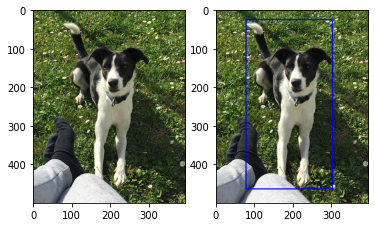

In [34]:
visualize_bbox(test_1["filename"], test_1["bbox"], show = True, save = False);

<Figure size 432x288 with 0 Axes>

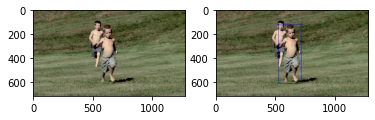

In [37]:
visualize_bbox(test_2["filename"], test_2["bbox"], show = True, save = False);